# Cdiscount retail Analysis

### Introduction

The aim of this project is to extract insigths from the datas of Cdiscount, a french online retail company.
Xe will analyze sales history data and identify key points that made the business profitable or not. These key points should be clear enough to help designing a new sales profitability strategy for the next year by kthe marketing director of A-to-Z-Market.

# Analysis preparation

## Loading packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Load the Sales Data

In [2]:
sales = pd.read_csv("D:\\Probook\\Python Project\\sales.csv")

# Data Exploration

## Glimps the Data

We look at the dataframe, the data shape, we look to few rows of the data and check for missing data

In [3]:
print(f"Rows: {sales.shape[0]}, Columns: {sales.shape[1]}")

Rows: 9994, Columns: 22


In [4]:
sales.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# getting quick information about variables
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
Order ID         9994 non-null object
Order Date       9994 non-null object
Order Year       9994 non-null int64
Order Quarter    9994 non-null int64
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9983 non-null float64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(4), int64(3), object(15)
memory usage: 1

In [6]:
# Converting Dates Columns to Pandas date time
sales['O_Date'] = pd.to_datetime(sales['Order Date'])
sales['S_Date'] = pd.to_datetime(sales['Ship Date'])

In [7]:
# Missing Value table
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(sales)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,O_Date,S_Date
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,object,int64,int64,object,object,object,object,object,object,...,object,object,object,object,float64,int64,float64,float64,datetime64[ns],datetime64[ns]


Lets group variables, numerical ones and object ones

In [9]:
print(sales.dtypes[sales.dtypes == "object"].index)
#print('Number of categorical features is:',sales.dtypes[sales.dtypes == "object"].count())
print('\n'*3)
#numerical
print(sales.dtypes[sales.dtypes != "object"].index, '\n\n')
print('Number of numerical variacles:',sales.dtypes[sales.dtypes != "object"].count(),'Number of categorical variables:',sales.dtypes[sales.dtypes == "object"].count())

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')




Index(['Order Year', 'Order Quarter', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit', 'O_Date', 'S_Date'],
      dtype='object') 


Number of numerical variacles: 9 Number of categorical variables: 15


Some Statistical description of our numerical variables

In [10]:
sales[['Order Year', 'Order Quarter', 'Postal Code', 'Sales', 'Quantity','Discount', 'Profit']].describe()

,Order Year,Order Quarter,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2017.722233,2.694617,55245.233297,229.858001,3.789574,0.156203,28.656896
std,1.123555,1.107635,32038.715955,623.245101,2.225110,0.206452,234.260108
min,2016.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2017.000000,2.000000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2018.000000,3.000000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,2019.000000,4.000000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2019.000000,4.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Insight

In [13]:
## Grouping cities by sales

In [16]:
By_City=sales.groupby(['City'])
By_City['Sales'].count().sort_values(ascending=False).reset_index()

,City,Sales
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Danbury,1
527,Orland Park,1
528,Davis,1
529,Ontario,1


<Figure size 1440x720 with 0 Axes>

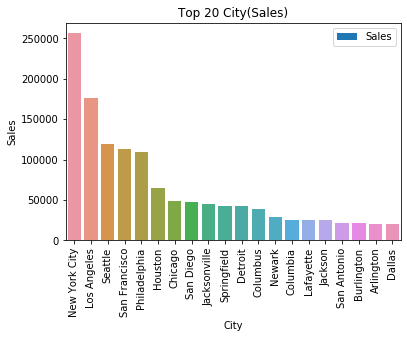

In [18]:
#Visualizing cities based on Sales
plt.figure(figsize=(20,10))
Top_20=By_City['Sales'].sum().sort_values(ascending=False).reset_index().head(20)
Top_20.plot(x='City',kind='bar',title='Top 20 City(Sales)')
sns.barplot(data=Top_20,x='City',y='Sales',ci=None)

<Figure size 1440x720 with 0 Axes>

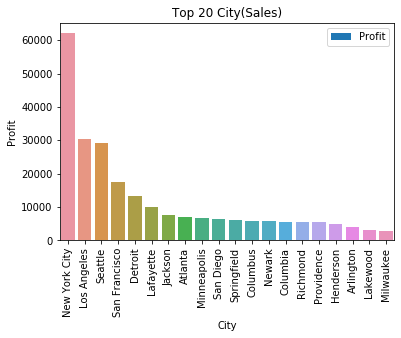

In [25]:
#Visualizing based on Profit
plt.figure(figsize=(20,10))
Top_20=By_City['Profit'].sum().sort_values(ascending=False).reset_index().head(20)
Top_20.plot(x='City',kind='bar',title='Top 20 City(Sales)')
sns.barplot(data=Top_20,x='City',y='Profit',ci=None)

<Figure size 1440x720 with 0 Axes>

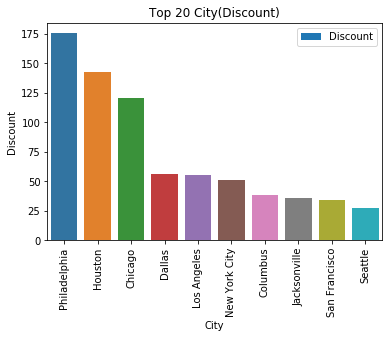

In [29]:
# Visuazling based on Discount
plt.figure(figsize=(20,10))
Top_20=By_City['Discount'].sum().sort_values(ascending=False).reset_index().head(10)
Top_20.plot(x='City',kind='bar',title='Top 20 City(Discount)')
sns.barplot(data=Top_20,x='City',y='Discount',ci=None)

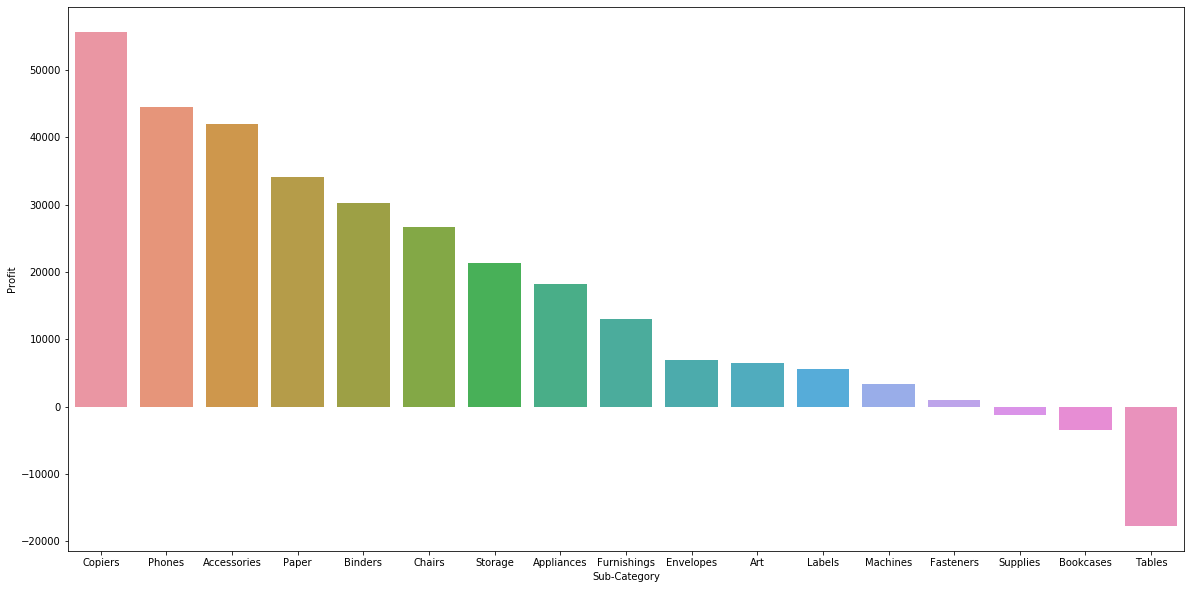

In [32]:
# Profit based on sub categories
plt.figure(figsize=(20,10))
by_subcategory=sales.groupby('Sub-Category')
profit_per_sub=by_subcategory['Profit'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=profit_per_sub,x='Sub-Category',y='Profit',ci=None)

In [35]:
sales['Sub-Category'].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [36]:
# Grouping categories
group_by_category = sales.groupby(sales['Sub-Category'])
sales_by_category =(group_by_category['Sales'].sum())
Profit_by_category =(group_by_category['Profit'].sum())

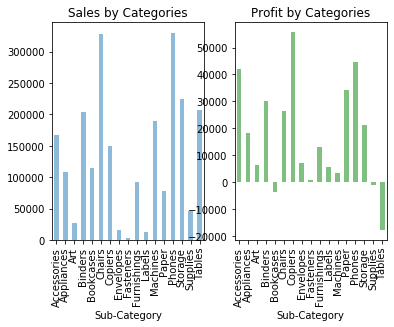

In [37]:
#Visualizing the sales and profit
fig, axes = plt.subplots(1,2)
sales_by_category.plot.bar(ax = axes [0],title = 'Sales by Categories',
                                                          alpha = .5)
Profit_by_category.plot.bar(ax = axes [1],title = 'Profit by Categories',
                                                          alpha = .5, color = "Green")

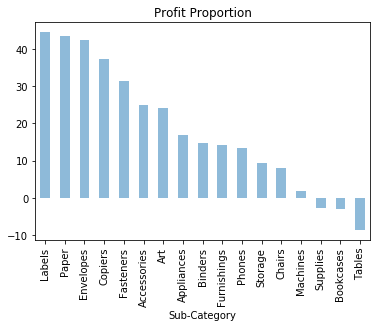

In [38]:
#Profit proportain (Profit/Sales)

profit_proportain = (Profit_by_category/sales_by_category)*100
profit_proportain.sort_values(ascending = False).plot.bar(title = 'Profit Proportion',
                                                          alpha= .5)

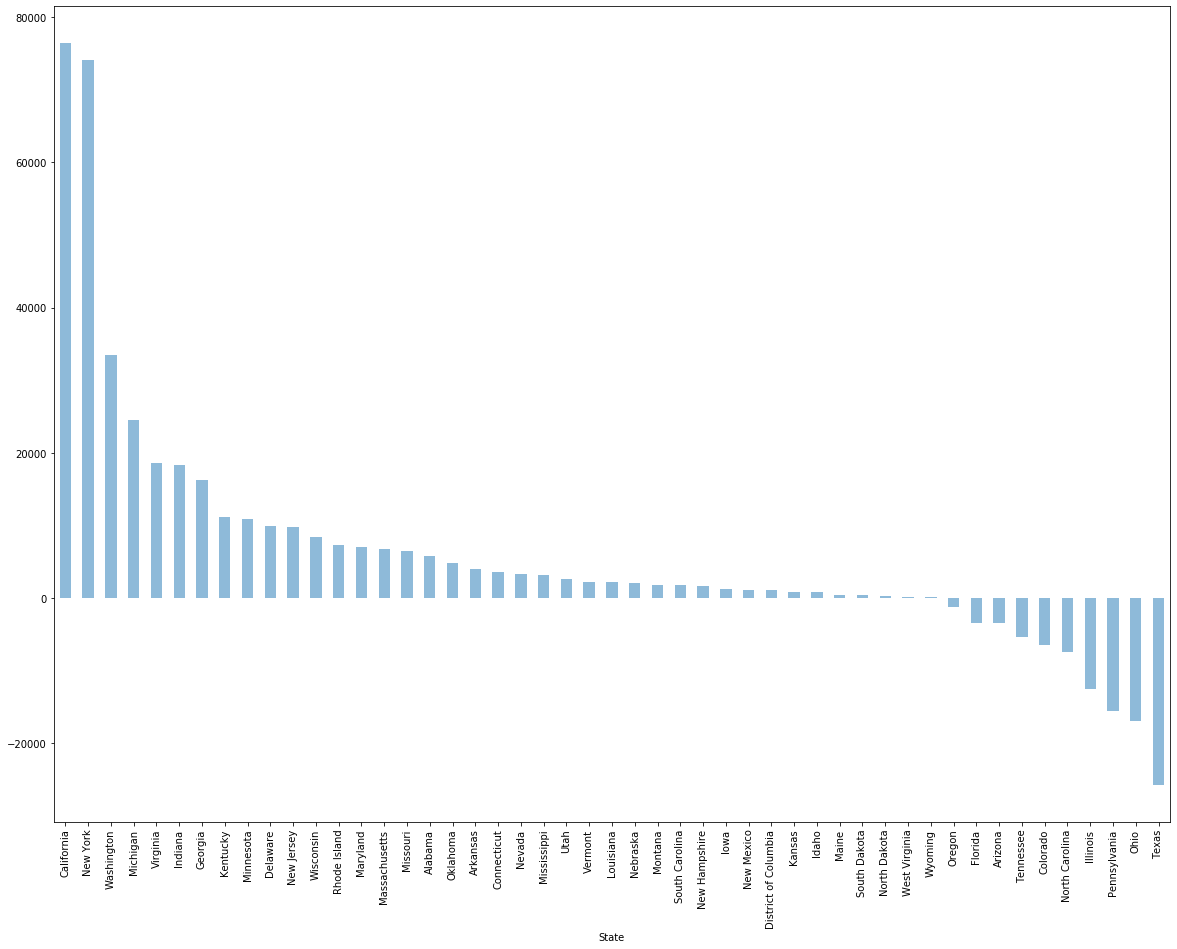

In [39]:
#sales based on states
plt.figure(figsize=(20,15))
group_by_state = sales['Profit'].groupby(sales['State'])
group_by_state.sum().sort_values(ascending = False).plot.bar(alpha = .5)